In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

In [3]:
sys.path.insert(0, parent_dir)

In [4]:
from scripts.tellco_data_analysis import fill_data_by_mean, format_data, treat_outlier_with_mean

In [5]:
telecom_data = pd.read_csv('../dataset/telecom.csv')
telecom_data = telecom_data.drop('Unnamed: 0', axis =1)

In [6]:
telecom_data

,Bearer Id,Start Date,Start ms,End Date,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [7]:
telecom_data.isnull().sum()

Bearer Id                                      0
Start Date                                     1
Start ms                                       0
End Date                                       1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [8]:
telecom_data['Last Location Name'] = telecom_data['Last Location Name'].fillna(telecom_data['Last Location Name'].mode()[0])

In [9]:
telecom_data.dropna(inplace=True)

In [10]:
telecom_data.columns

Index(['Bearer Id', 'Start Date', 'Start ms', 'End Date', 'End ms',
       'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < V

In [11]:
engegment_data = telecom_data.groupby('Bearer Id').agg({
    
    'Handset Type':'count',
    'Handset Manufacturer':'count'
})

In [12]:
top_10_Handsets = telecom_data['Handset Type'].value_counts().nlargest(10)

In [13]:
print(top_10_Handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [34]:
top_3_manufacturers = telecom_data['Handset Manufacturer'].value_counts().nlargest(3).index

In [35]:
print(top_3_manufacturers)

Index(['Apple', 'Samsung', 'Huawei'], dtype='object', name='Handset Manufacturer')


In [22]:
telecom_data['Handset Manufacturer']

0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149995    undefined
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
Name: Handset Manufacturer, Length: 149429, dtype: object

In [23]:
telecom_data['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149995                      undefined
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
Name: Handset Type, Length: 149429, dtype: object

In [24]:
telecom_data['Manufacturer'] = telecom_data['Handset Type'].str.split().str[0]

In [25]:
telecom_data['Manufacturer']

0           Samsung
1           Samsung
2           Samsung
3         undefined
4           Samsung
            ...    
149995    undefined
149996        Apple
149997        Apple
149998        Apple
149999       Huawei
Name: Manufacturer, Length: 149429, dtype: object

In [43]:
# top_3_manufacturers = telecom_data['Manufacturer'].value_counts().nlargest(3).index

# Find top 5 handsets for each of the top 3 manufacturers
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers:
    manufacturer_data = telecom_data[telecom_data['Manufacturer'] == manufacturer]
    top_5 = manufacturer_data['Handset Type'].value_counts().nlargest(3)
    top_5_handsets_per_manufacturer[manufacturer] = top_5

# Print the results (nicely formatted)
for manufacturer, top_handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(top_handsets)



Top 5 Handsets for Apple:
Handset Type
Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Series([], Name: count, dtype: int64)

Top 5 Handsets for Huawei:
Series([], Name: count, dtype: int64)


#### Aggregation by user

In [45]:
telecom_data.head(2)

,Bearer Id,Start Date,Start ms,End Date,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Manufacturer
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,Apple
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,Apple


In [46]:
telecom_data.columns

Index(['Bearer Id', 'Start Date', 'Start ms', 'End Date', 'End ms',
       'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < V

In [53]:
telecom_data['total_data_volume'] = telecom_data['Total UL (Bytes)'] + telecom_data['Total DL (Bytes)']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149995    872761860.0
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
Length: 149429, dtype: float64

In [54]:
user_experience = telecom_data.groupby('Bearer Id').agg({

    'Bearer Id':'count',
    'Dur. (ms)':'sum',
    'Total UL (Bytes)':'sum',
    'Total DL (Bytes)':'sum',
    'total_data_volume':'sum'
    
})
data = user_experience.reindex()
print(data)

              Bearer Id  Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)  \
Bearer Id                                                                
6.917538e+18          1    24534.0        41704610.0       500721999.0   
6.917538e+18          1    21489.0        38693596.0       709549265.0   
6.917538e+18          1    27786.0        15548926.0       854465860.0   
6.917538e+18          1    15635.0        49605688.0       825786510.0   
6.917538e+18          1    24264.0        21983463.0       624957763.0   
...                 ...        ...               ...               ...   
1.318654e+19          1    80024.0        35412664.0       145293140.0   
1.318654e+19          1   145291.0        36189587.0       387001634.0   
1.318654e+19          1    86399.0        35919460.0       872688792.0   
1.318654e+19          1    86399.0        40877676.0       386355068.0   
1.318654e+19          1   103113.0        46147558.0       327212841.0   

              total_data_volume  
Bea

In [62]:
telecom_data['Total_Duration'] = telecom_data['Dur. (ms)'].sum()

In [63]:
telecom_data['Total_Duration']

0         1.565363e+10
1         1.565363e+10
2         1.565363e+10
3         1.565363e+10
4         1.565363e+10
              ...     
149995    1.565363e+10
149996    1.565363e+10
149997    1.565363e+10
149998    1.565363e+10
149999    1.565363e+10
Name: Total_Duration, Length: 149429, dtype: float64

In [60]:
telecom_data['Decile'] = pd.qcut(telecom_data['Total_Duration'], 10, labels=False) #10 deciles
decile_data = telecom_data.groupby('Decile')['total_data_volume'].sum()
print("\nTotal Data per Decile:\n", decile_data)

ValueError: Bin edges must be unique: Index([15653634254.0, 15653634254.0, 15653634254.0, 15653634254.0,
       15653634254.0, 15653634254.0, 15653634254.0, 15653634254.0,
       15653634254.0, 15653634254.0, 15653634254.0],
      dtype='float64', name='Total_Duration').
You can drop duplicate edges by setting the 'duplicates' kwarg

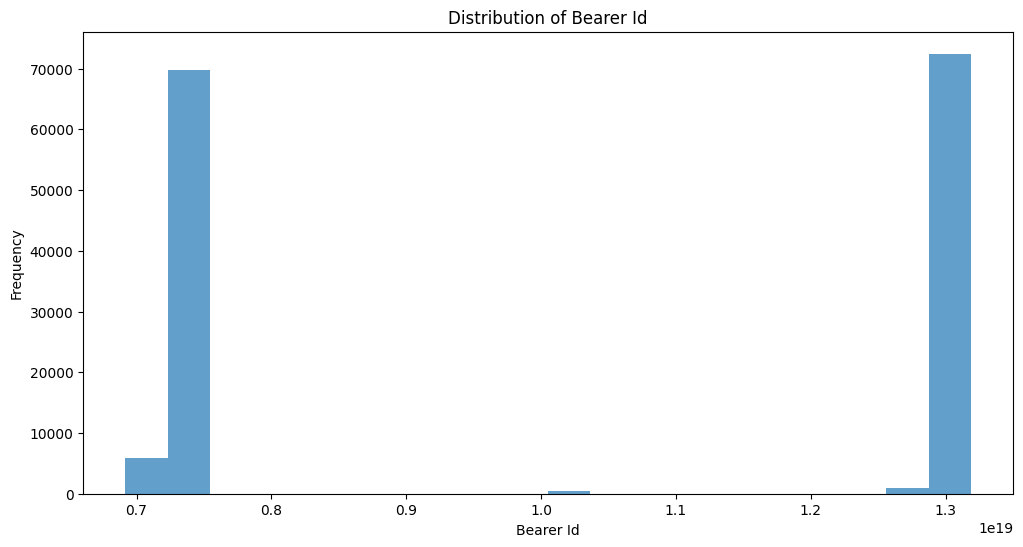

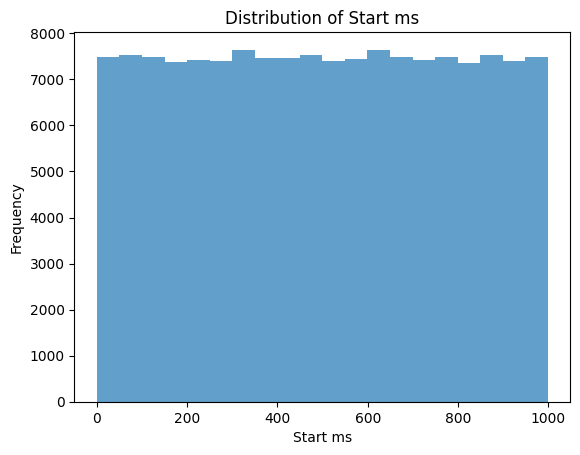

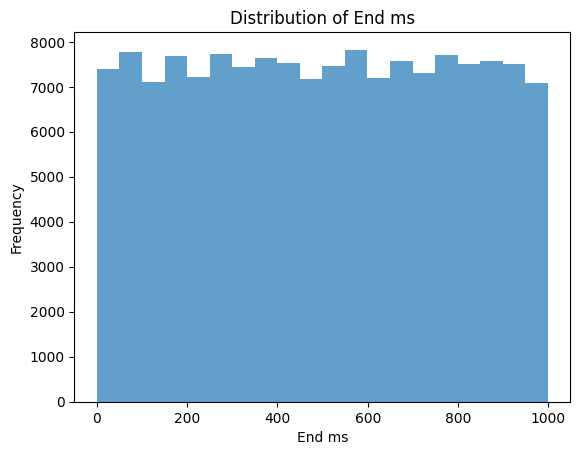

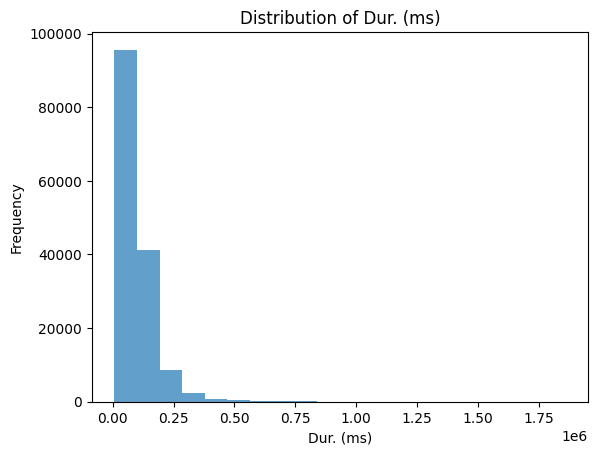

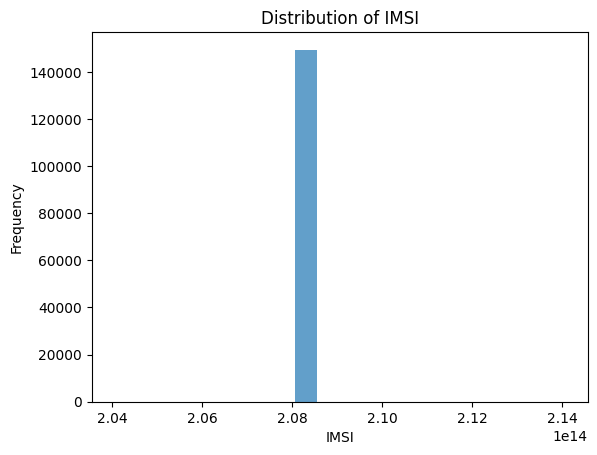

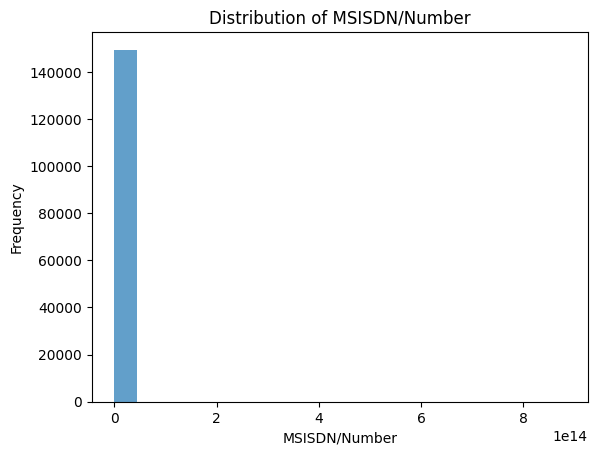

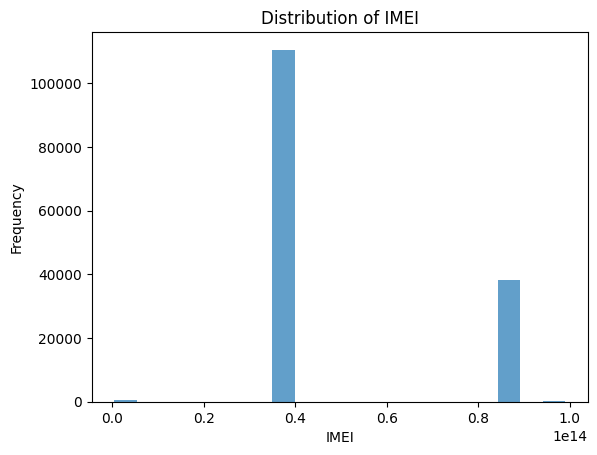

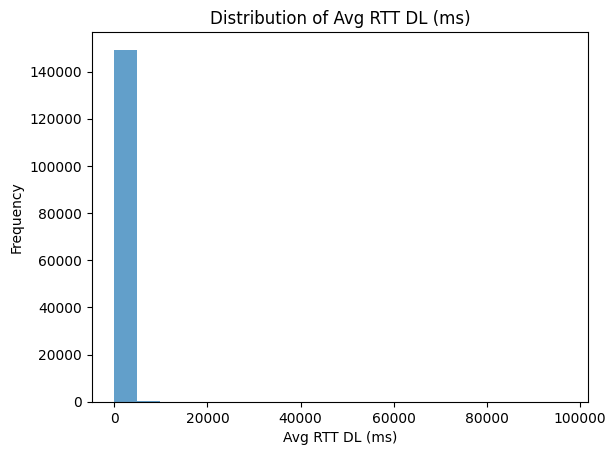

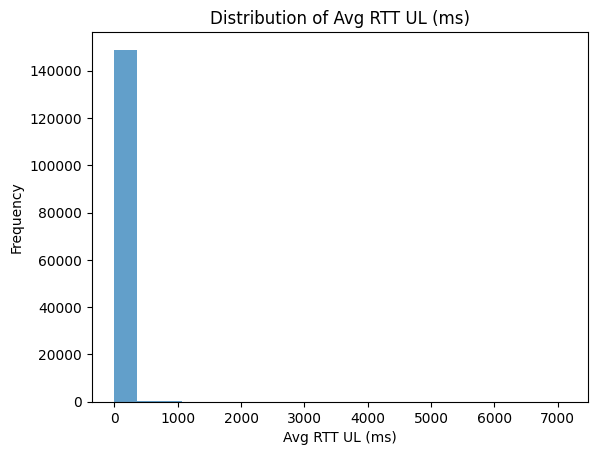

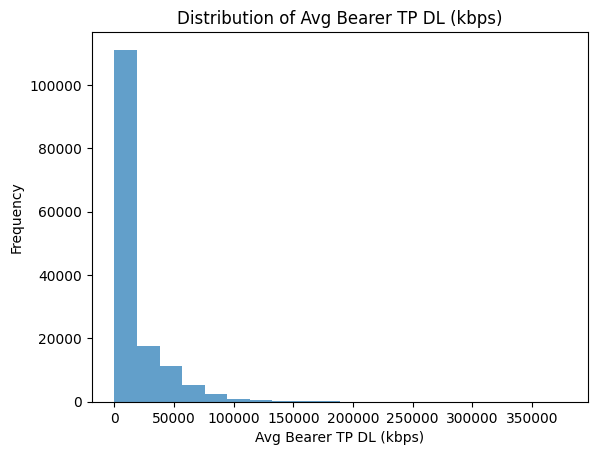

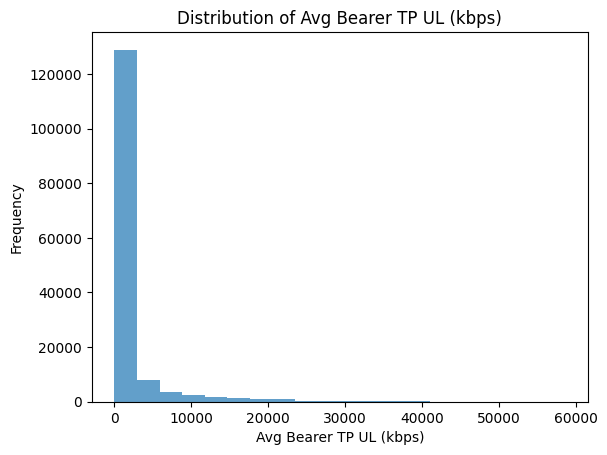

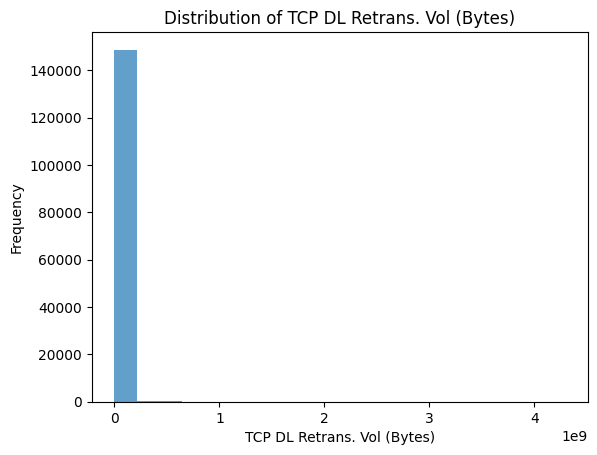

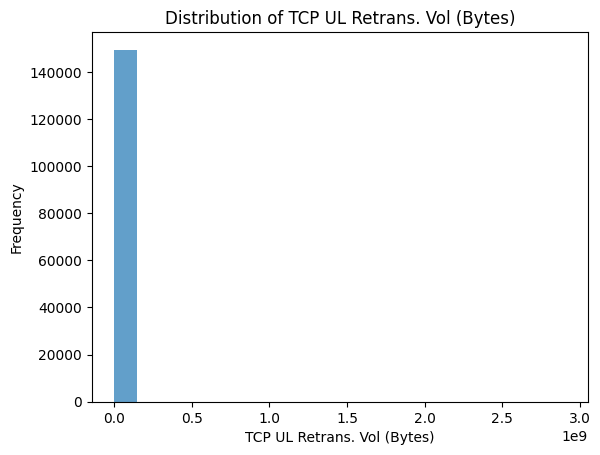

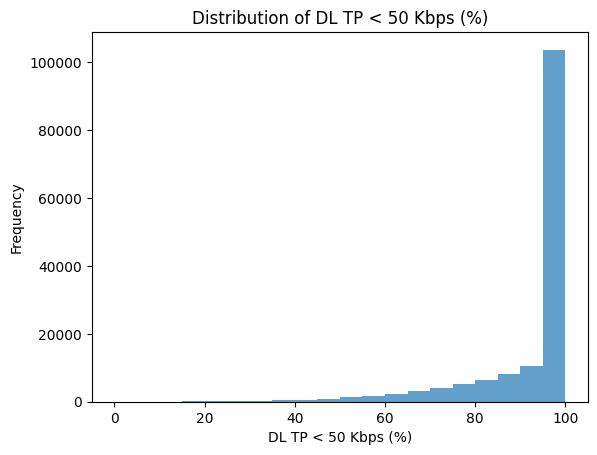

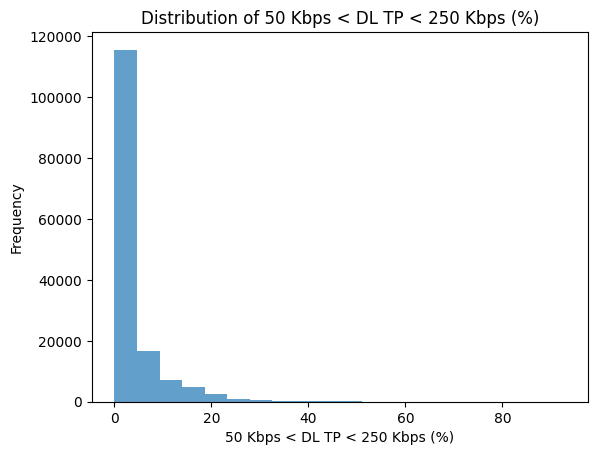

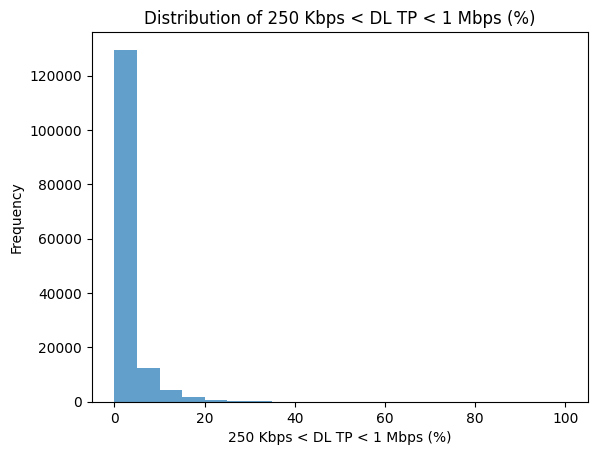

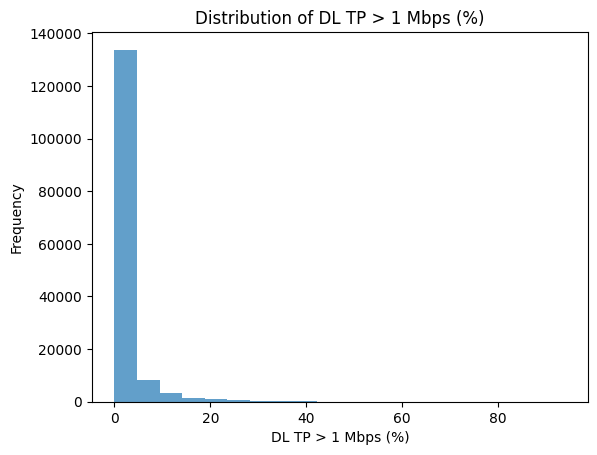

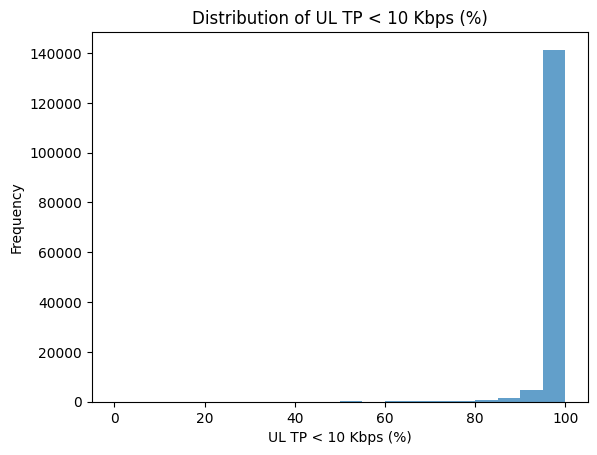

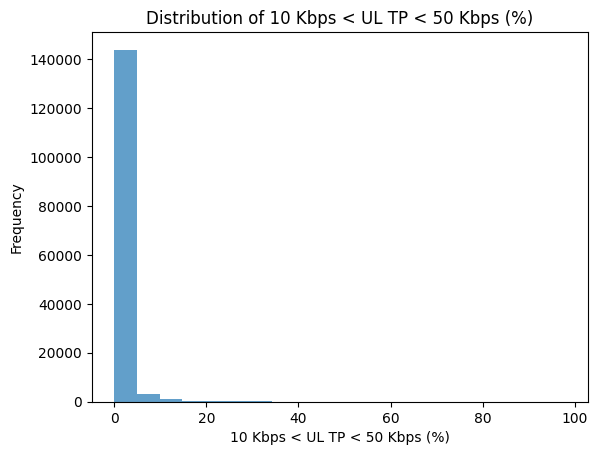

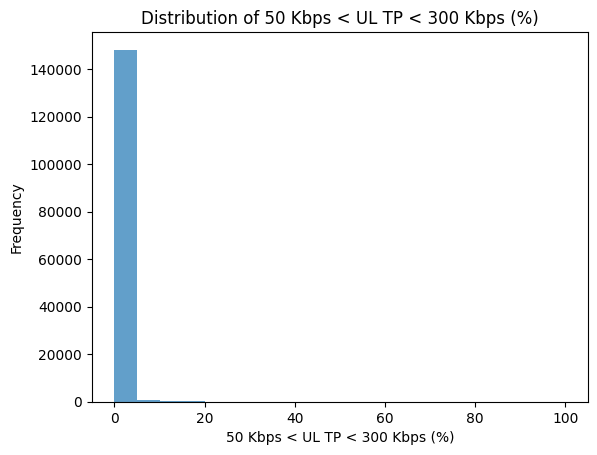

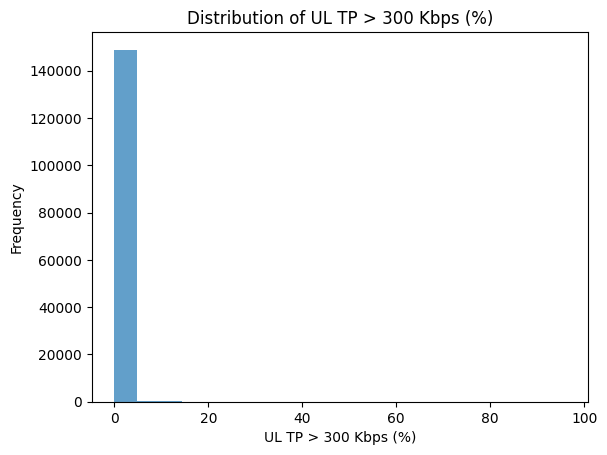

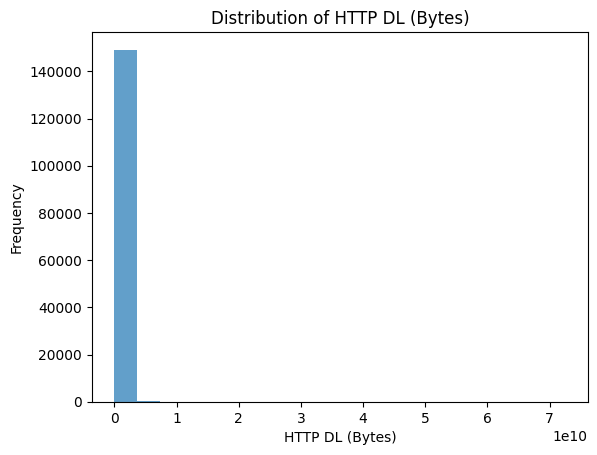

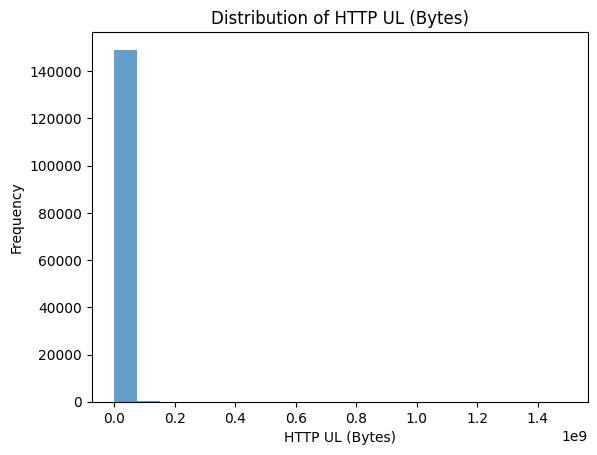

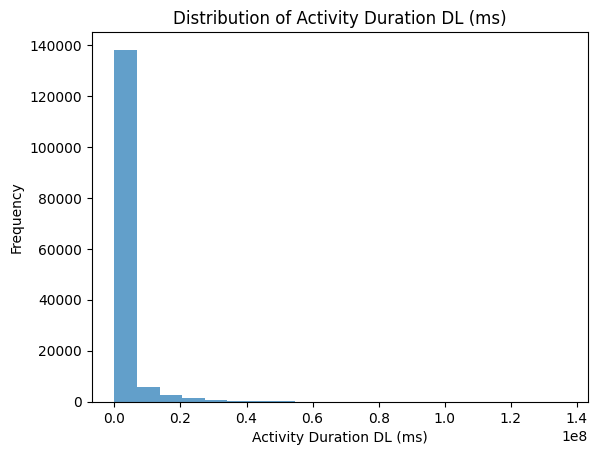

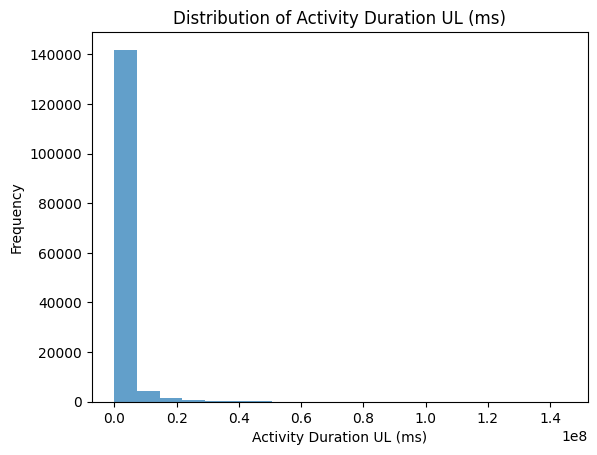

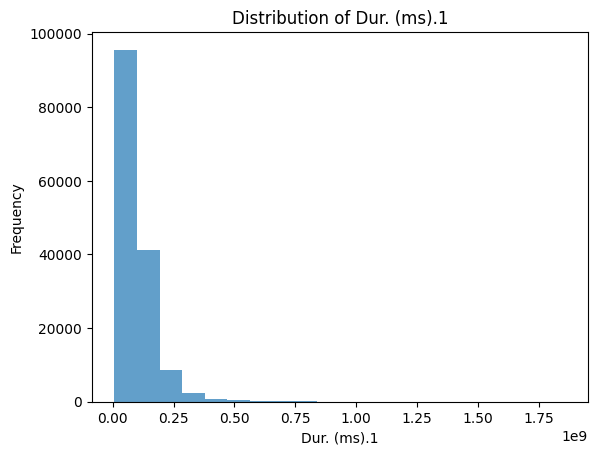

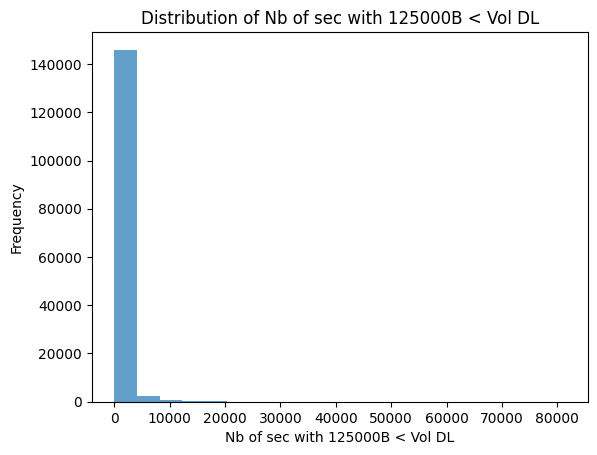

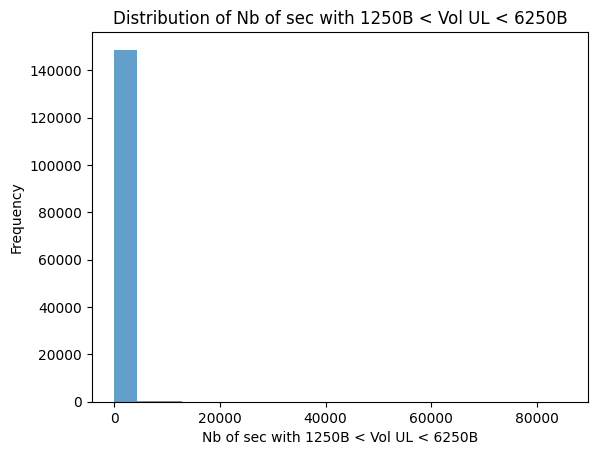

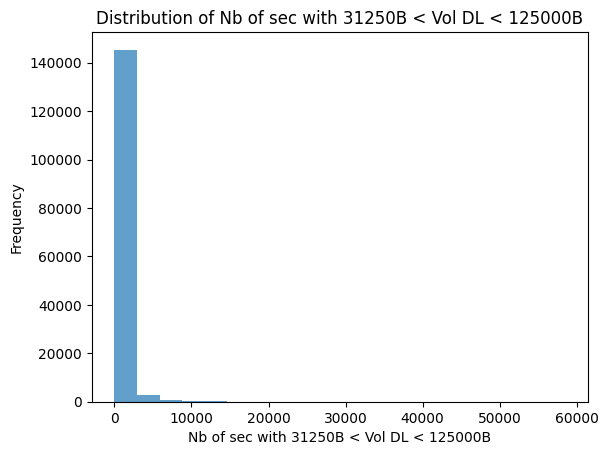

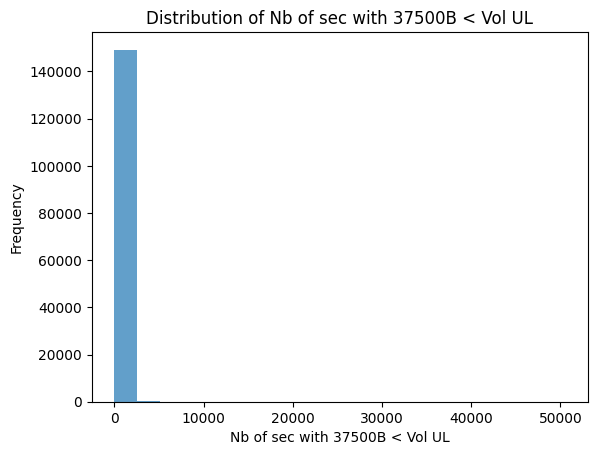

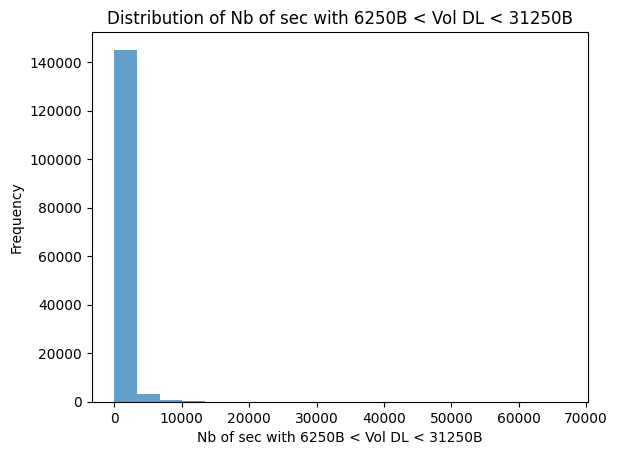

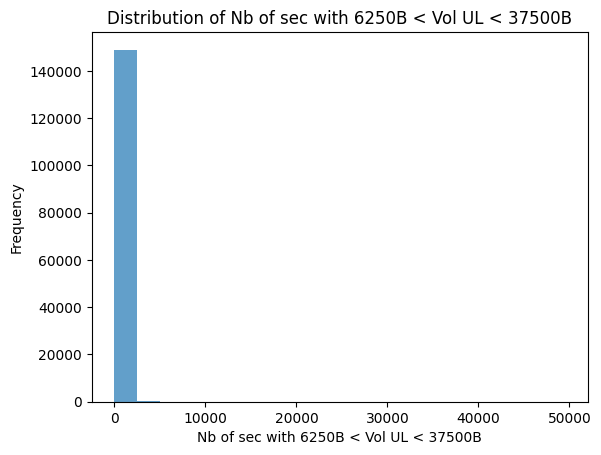

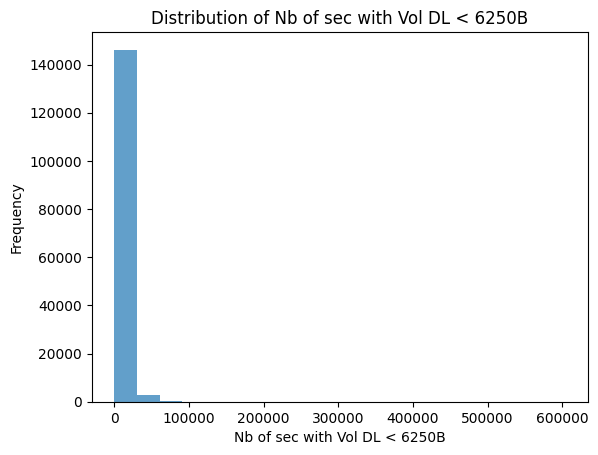

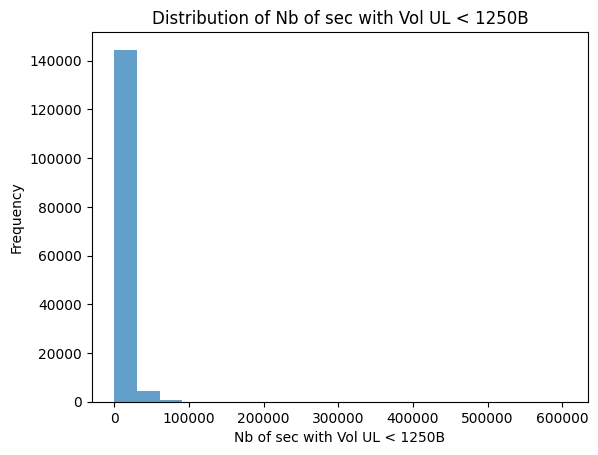

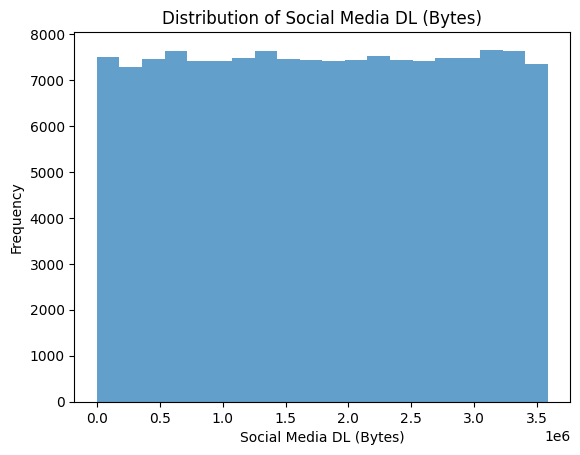

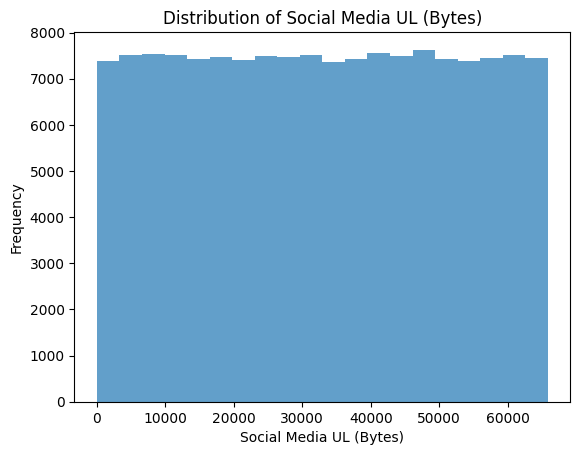

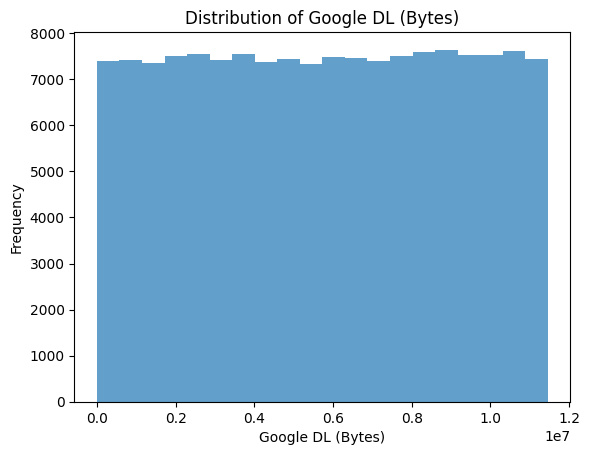

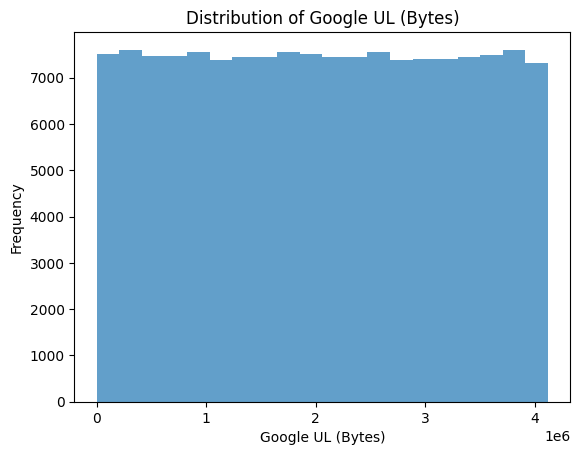

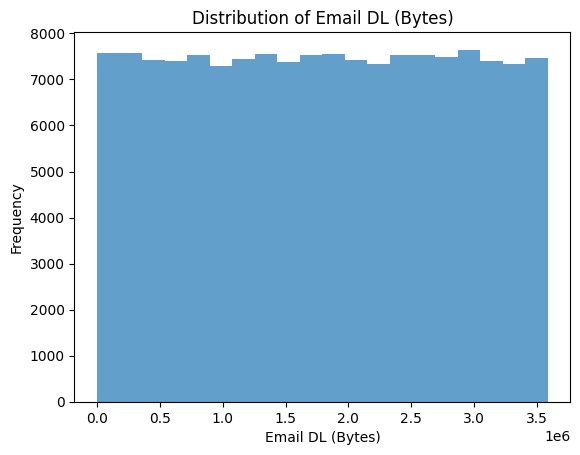

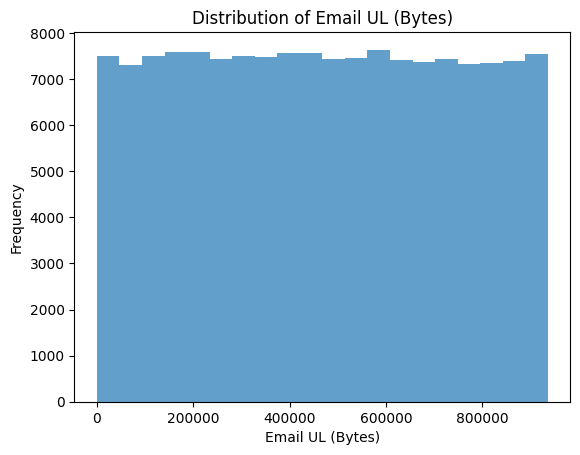

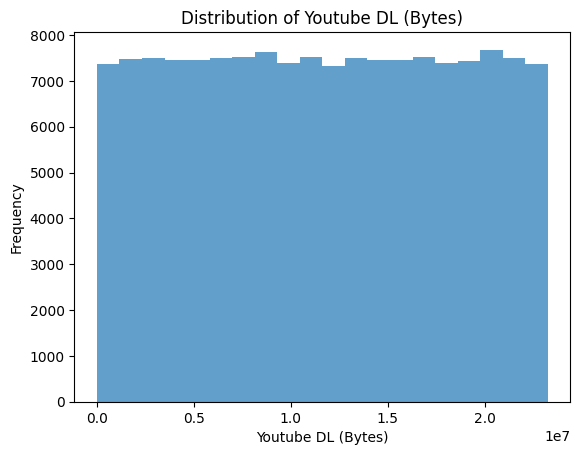

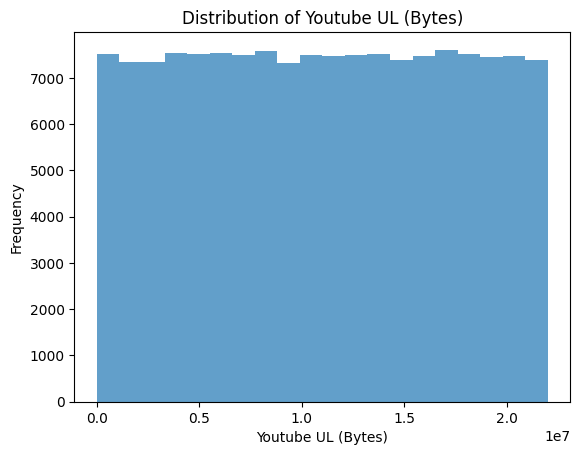

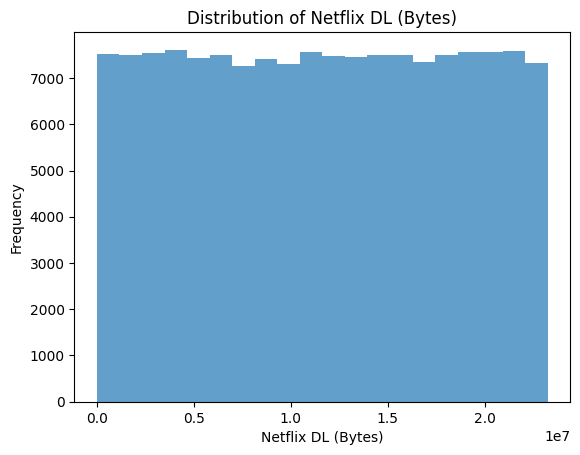

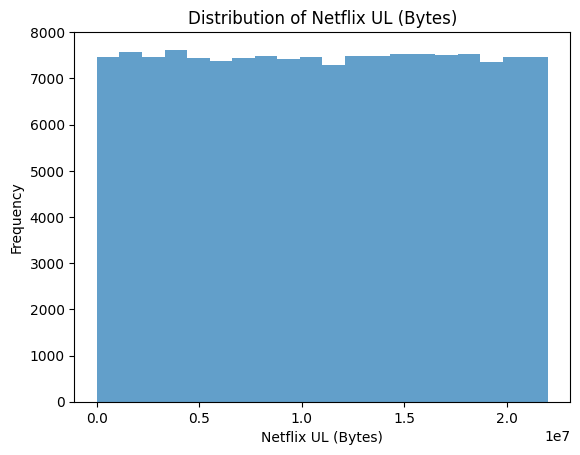

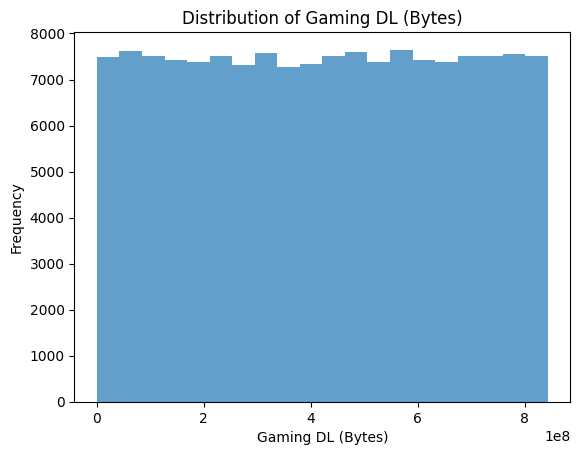

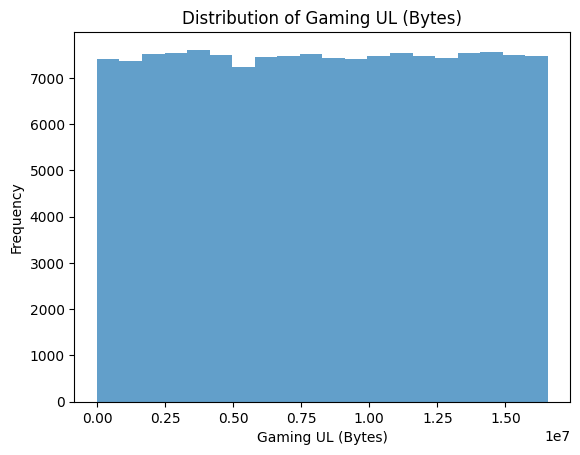

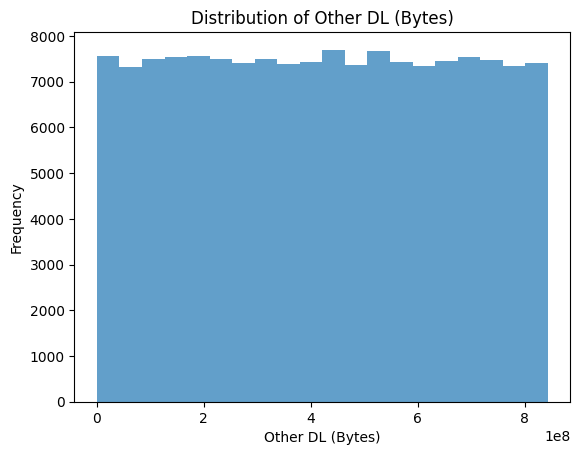

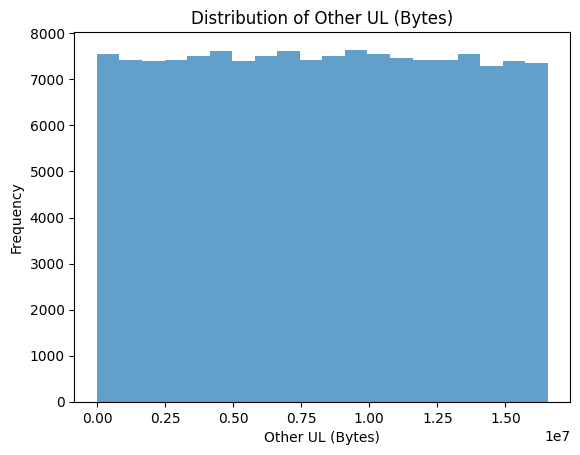

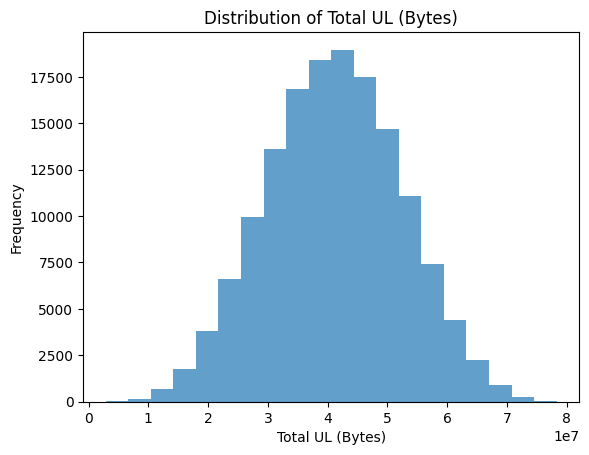

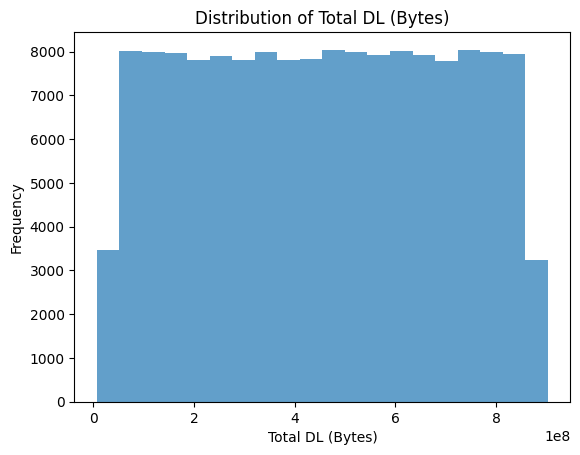

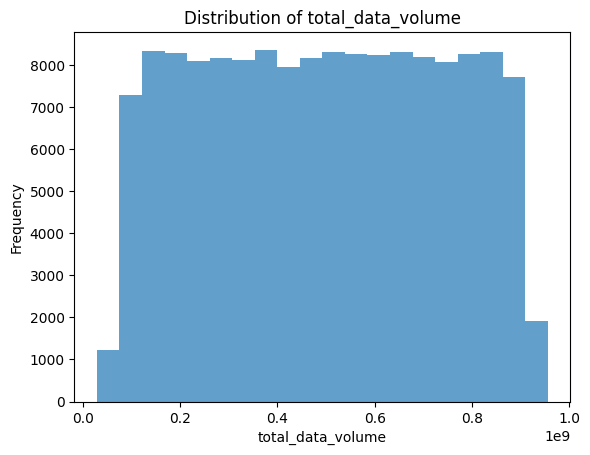

In [56]:
plt.figure(figsize=(12, 6))
for col in telecom_data.select_dtypes(include=np.number).columns:
    plt.hist(telecom_data[col], bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

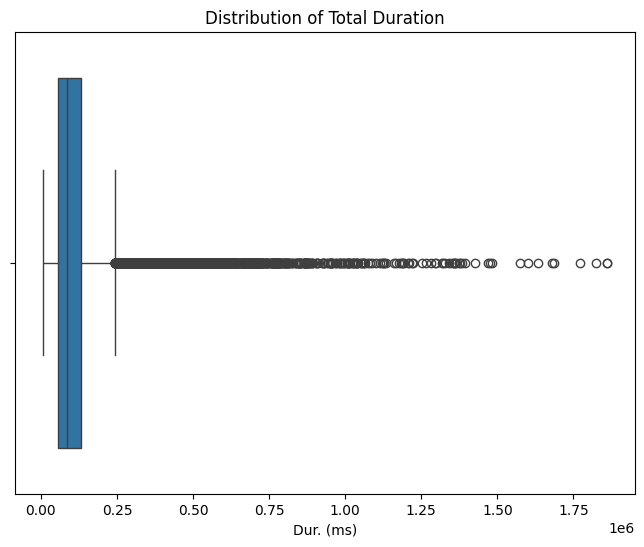

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(x=telecom_data['Dur. (ms)'])
plt.title('Distribution of Total Duration')
plt.show

In [ ]:
telecom_data['Total_Duration'] = telecom_data['session_duration'].sum()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='application', y='Total_Data', data=telecom_data)
plt.xticks(rotation=90)
plt.title('Relationship between Application and Total Data')
plt.show
